In [215]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import os
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [121]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [122]:
X_train = x_train[0:40000] # to Train 
Y_train = y_train[0:40000] # to Train
Y_train = np.reshape(Y_train, (40000,)) # to reshape
X_valid = x_train[40000:]  # to Validate
Y_valid = y_train[40000:] # to Validate 
Y_valid = np.reshape(Y_valid, (10000,)) # to reshape
X_test = x_test # to Test
Y_test = y_test # to Test
Y_test = np.reshape(Y_test, (10000,)) # to reshape

In [212]:
X_train.shape

(40000, 32, 32, 3)

In [ ]:
## Without feature scale

In [83]:
# from pathlib import Path
# Path(r"F:\AI\CIFAR100\train").parts[-1] # to get folder's name 

In [129]:
import os

folder_path = r"F:\AI\CIFAR100\train"

# Open the folder in the default file explorer
subprocess.run(["start", "", folder_path], shell=True)

# List the folders inside the folder
labels= next(os.walk(folder_path))[1]
print(len(labels))
print(labels)

100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tr

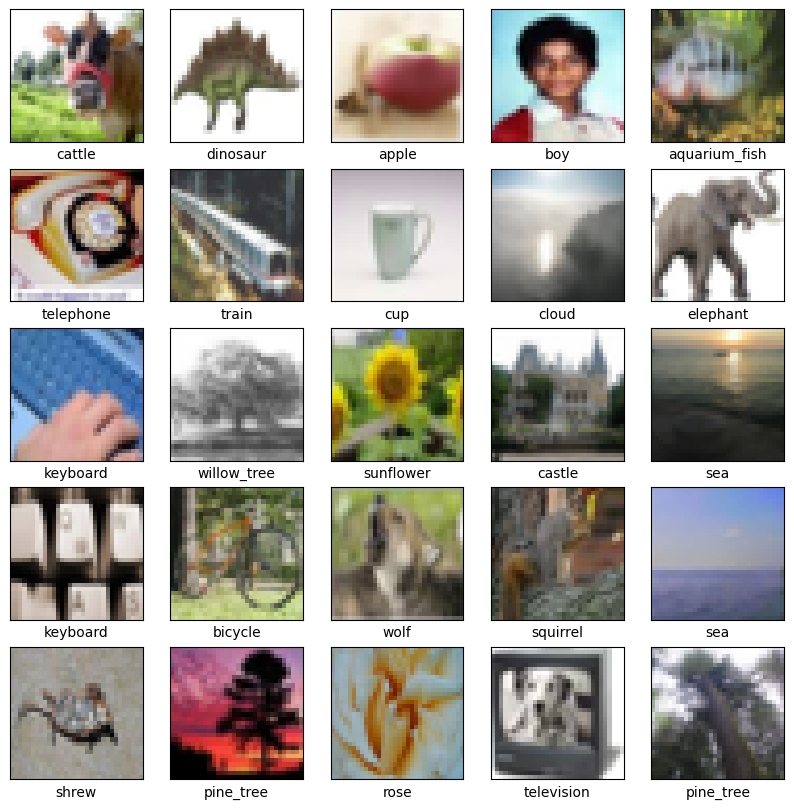

In [133]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(labels[Y_train[i]])
plt.show()

## Model

In [207]:
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3), kernel_size = (2, 2), padding = 'same', strides = (2, 2), filters = 32))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'same'))
# model.add(Dropout(0.25))
model.add(Conv2D(kernel_size = (2, 2), padding = 'same', strides = (2, 2), filters = 64))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'same'))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 100, activation = 'softmax'))

In [208]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 16, 16, 32)        416       
                                                                 
 batch_normalization_24 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 batch_normalization_25 (Bat  (None, 8, 8, 64)         256       
 chNormalization)                                                
                                                     

In [209]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])       

In [211]:
model.fit(X_train, Y_train, epochs = 80, validation_data = (X_valid, Y_valid), batch_size = 64)        

Epoch 1/80
625/625 [==============================] - 24s 39ms/step - loss: 1.4277 - accuracy: 0.5882 - val_loss: 2.9991 - val_accuracy: 0.3413
Epoch 2/80
625/625 [==============================] - 28s 44ms/step - loss: 1.3940 - accuracy: 0.5963 - val_loss: 2.9809 - val_accuracy: 0.3396
Epoch 3/80
625/625 [==============================] - 28s 44ms/step - loss: 1.3716 - accuracy: 0.6032 - val_loss: 3.0144 - val_accuracy: 0.3472
Epoch 4/80
625/625 [==============================] - 29s 46ms/step - loss: 1.3520 - accuracy: 0.6087 - val_loss: 3.0721 - val_accuracy: 0.3496
Epoch 5/80
625/625 [==============================] - 27s 43ms/step - loss: 1.3156 - accuracy: 0.6195 - val_loss: 3.2690 - val_accuracy: 0.3408
Epoch 6/80
625/625 [==============================] - 26s 42ms/step - loss: 1.2928 - accuracy: 0.6240 - val_loss: 3.2988 - val_accuracy: 0.3314
Epoch 7/80
625/625 [==============================] - 28s 44ms/step - loss: 1.2640 - accuracy: 0.6316 - val_loss: 3.1873 - val_accuracy:

625/625 [==============================] - 26s 41ms/step - loss: 0.6782 - accuracy: 0.7986 - val_loss: 4.0855 - val_accuracy: 0.3259
Epoch 58/80
625/625 [==============================] - 26s 41ms/step - loss: 0.6774 - accuracy: 0.7977 - val_loss: 4.1756 - val_accuracy: 0.3233
Epoch 59/80
625/625 [==============================] - 26s 42ms/step - loss: 0.6681 - accuracy: 0.8013 - val_loss: 4.1990 - val_accuracy: 0.3221
Epoch 60/80
625/625 [==============================] - 26s 41ms/step - loss: 0.6605 - accuracy: 0.8044 - val_loss: 4.3753 - val_accuracy: 0.3205
Epoch 61/80
625/625 [==============================] - 26s 42ms/step - loss: 0.6555 - accuracy: 0.8070 - val_loss: 4.0857 - val_accuracy: 0.3182
Epoch 62/80
625/625 [==============================] - 27s 43ms/step - loss: 0.6590 - accuracy: 0.8059 - val_loss: 4.2024 - val_accuracy: 0.3268
Epoch 63/80
625/625 [==============================] - 26s 42ms/step - loss: 0.6466 - accuracy: 0.8067 - val_loss: 4.3501 - val_accuracy: 0.32

#### Epochs = 5 uchun

In [ ]:
# bitta dropout() deactive in FC tepadan pastga birinchisi  acc= 26 and batch_size = 64,
# hammasida dropout() active acc= 20 and batch_size = 64, 
# BatchNormalization deactivate acc= 0.0096 and batch_size = 64, 
# BatchNormalization activate and ikkita Dropout() deactivate acc= 34 for FC and batch_size = 64, 
# all Dropout() deactivate acc= 40 and batch_size = 64, 
# Dropout() deactivate in FC tepadan pastga ikkinchisi acc= 24 and batch_size = 64, batch_size = 32, acc=  24
# Dropout() deactivate in FC hammasi acc= 34 and batch_size = 64, 
# epochs = 8/30 acc = 37, without strides = (2, 2), 1/30 acc = 0.01 and bitta epoch uchun about = 5 minuts
# epochs = 30 oxirgi Dropout() deactivate acc = 52
# epochs = 30 CNN dagi all Dropout() deactivate  acc = 58

In [213]:
model.save('F:\AI\model')

INFO:tensorflow:Assets written to: F:\AI\model\assets


INFO:tensorflow:Assets written to: F:\AI\model\assets


In [216]:
model_load = load_model('F:\AI\model')

In [235]:
test_loss,test_acc=model_load.evaluate(X_valid, Y_valid)
print("test accuracy: ",test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 4.4836 - accuracy: 0.3250
test accuracy:  0.32499998807907104


In [231]:
predictions = model_load.predict(X_test[1:2])    
predictions = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 20ms/step


In [237]:
def get_predictions(X_test):
    predictions = model_load.predict(X_test)    
    predictions = np.argmax(predictions, axis=1)  
    return predictions 

313/313 [==============================] - 2s 6ms/step


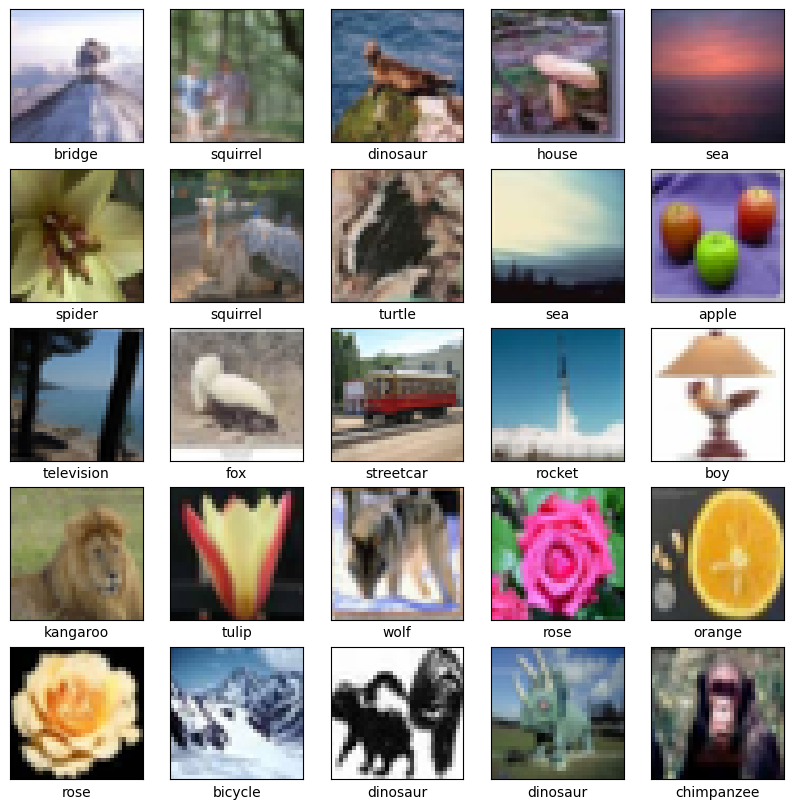

In [250]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(labels[get_predictions(X_test)[i]])
plt.show()